# Homework 1 - data validation & cleaning - To do

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best as you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features, however, it does not mean that the teacher will give you more points. Focus on quality, not quantity.
* Properly comment all your steps. Comments are evaluated for 2 points of the total together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is the most challenging of the three, both timewise and computationally. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e. do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least **three features** where you expect problems (include "Object Name" feature). You can propose how to clean the selected features, however do not apply cleaning (in your interest) 🙂 _(1.5 points)_
  3. Select at least **two features** where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only). _(2 points)_
  4. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical and one datetime. _(1.5 points)_
  5. Find some outliers and describe your method. _(3 points, depends on creativity)_
  6. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature**. _(1 + 3 points, depends on creativity)_
  7. Focus more precisely on the cleaning of the "Medium" feature. As if you were to use it in KNN algorithm later. _(2 points)_
  8. Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps and following code **have to be commented!** Comments are evaluated for 2 points together with the final presentation of the solution.

**If you do all this properly, you will obtain 18 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

# Cleaning of The Metropolitan Museum of Art Open Access dataset

## Ekaterina Simonova - Bioinformatics, UCT

To better/easier follow my work, I put the number from to do list where I worked on the problem, at the chapter where you will see (3.) for this column I worked on integrity problem.

To download the data I used the following command in bash:

wget https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv

Afterwards I dragged the file into the folder of DeepNote environment. Before we start with the analysis of the dataset let's get familiar with the data and it's attributes. The dataset contains 54 columns and 476306 rows. Now we can start to explore our data :)

## Loading libraries &amp; Data


As first step in my project, I will import all necessary modules and packages, which I will use to explore and clean the data.

In [ ]:
# Data handling and processing
import pandas as pd
import numpy as np

# Data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# model fine-tuning and evaluation
from sklearn.metrics import mean_squared_error

# sklearn packages
from sklearn.impute import SimpleImputer,KNNImputer

Let's now load the data and look at the first few rows.

In [ ]:
# data loading 
df = pd.read_csv("MetObjects.csv")
display(df.head())

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Object Number  Is Highlight  Is Timeline Work  Is Public Domain  Object ID  \
0    1979.486.1         False             False             False          1   
1    1980.264.5         False             False             False          2   
2      67.265.9         False             False             False          3   
3     67.265.10         False             False             False          4   
4     67.265.11         False             False             False          5   

  Gallery Number         Department AccessionYear Object Name  \
0            NaN  The American Wing        1979.0        Coin   
1            NaN  The American Wing        1980.0        Coin   
2            NaN  The American Wing        1967.0        Coin   
3            NaN  The American Wing        1967.0        Coin   
4            NaN  The American Wing        1967.0        Coin   

                          Title  ... River Classification  \
0  One-dollar Liberty Head Coin  ...   NaN            NaN   
1  Ten-dollar Liberty Head Coin  ...   NaN            NaN   
2    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
3    Two-and-a-Half Dollar Coin  ...   NaN            NaN   
4    Two-and-a-Half Dollar Coin  ...   NaN            NaN   

  Rights and Reproduction                                     Link Resource  \
0                     NaN  http://www.metmuseum.org/art/collection/search/1   
1                     NaN  http://www.metmuseum.org/art/collection/search/2   
2                     NaN  http://www.metmuseum.org/art/collection/search/3   
3                     NaN  http://www.metmuseum.org/art/collection/search/4   
4                     NaN  http://www.metmuseum.org/art/collection/search/5   

  Object Wikidata URL Metadata Date                                Repository  \
0                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
1                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
2                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
3                 NaN           NaN  Metropolitan Museum of Art, New York, NY   
4                 NaN           NaN  Metropolitan Museum of Art, New York, NY   

  Tags Tags AAT URL Tags Wikidata URL  
0  NaN          NaN               NaN  
1  NaN          NaN               NaN  
2  NaN          NaN               NaN  
3  NaN          NaN               NaN  
4  NaN          NaN               NaN  

[5 rows x 54 columns]

From the first glance, we can see that dataset containt many nan values, some values are also missing with empty enteries or there might be a space instead (Artist prefix column the first and the second row). Let's

In [ ]:
display(df.shape)
display(df.info())

(476306, 54)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476306 entries, 0 to 476305
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            476306 non-null  object 
 1   Is Highlight             476306 non-null  bool   
 2   Is Timeline Work         476306 non-null  bool   
 3   Is Public Domain         476306 non-null  bool   
 4   Object ID                476306 non-null  int64  
 5   Gallery Number           46768 non-null   object 
 6   Department               476306 non-null  object 
 7   AccessionYear            471919 non-null  object 
 8   Object Name              474762 non-null  object 
 9   Title                    447079 non-null  object 
 10  Culture                  207065 non-null  object 
 11  Period                   90812 non-null   object 
 12  Dynasty                  23237 non-null   object 
 13  Reign                    11225 non-null   object 
 14  Port

None

From above we can see that Metadata Date column contains only null values so we can remove this column from the dataset. Let's also reindex dataset to set Object ID as an index.

In [ ]:
# chckeing if every value is unique for this column
df["Object ID"].nunique()
df = df.set_index("Object ID")
df = df.drop("Metadata Date", axis=1)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            476306 non-null  object
 1   Is Highlight             476306 non-null  bool  
 2   Is Timeline Work         476306 non-null  bool  
 3   Is Public Domain         476306 non-null  bool  
 4   Gallery Number           46768 non-null   object
 5   Department               476306 non-null  object
 6   AccessionYear            471919 non-null  object
 7   Object Name              474762 non-null  object
 8   Title                    447079 non-null  object
 9   Culture                  207065 non-null  object
 10  Period                   90812 non-null   object
 11  Dynasty                  23237 non-null   object
 12  Reign                    11225 non-null   object
 13  Portfolio                23356 non-null   object
 14  Constituent ID      

None

Let's now also check for duplicated values.

In [ ]:
display(df.duplicated().sum())

0

## Exploring the data

In order to get familliar with the dataset let's visualize some columns and select those which we will work with.

<AxesSubplot:>

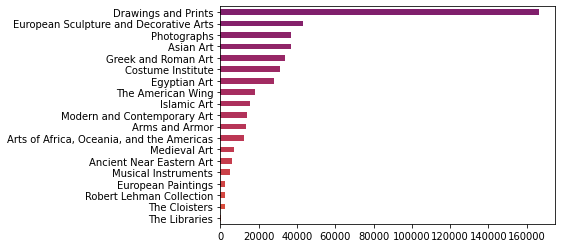

In [ ]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))
df["Department"].value_counts().sort_values().plot(kind = 'barh', color=color)

<AxesSubplot:>

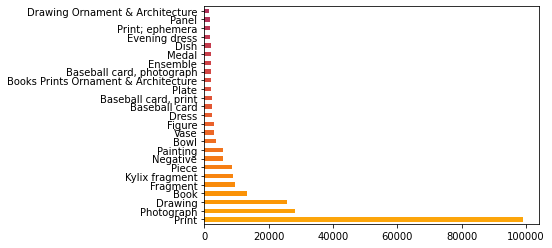

In [ ]:
color = cm.inferno_r(np.linspace(.2, .6, 30))
df["Object Name"].value_counts().sort_values(ascending=False)[:25].plot(kind = 'barh', color=color)

In [ ]:
df["Object Name"].value_counts().sort_values(ascending=True)[:25]

Winepot with cover                                                      1
Roundels, pair                                                          1
Dagger (Kindjal) with scabbard                                          1
Langorony?                                                              1
Rabbet plane                                                            1
Antefix, Gorgoneion in relief                                           1
Block Statue                                                            1
Helmet prototype                                                        1
Bowspear (Yumi-yari)                                                    1
Intaglio of Aphrodite/muse                                              1
Scarab, Bes, ape, vulture, winged sun                                   1
End of a Noh wig band                                                   1
Fragment, feldspar (1 with 92 unaccessioned; dish)                      1
Lyre clock                            

In [ ]:
df["Title"].value_counts().sort_values(ascending=False)[:25]

Terracotta fragment of a kylix (drinking cup)        6415
Piece                                                4681
Fragment                                             3511
Dress                                                2446
Ensemble                                             1960
Terracotta rim fragment of a kylix (drinking cup)    1839
Textile Fragment                                     1831
Bowl                                                 1798
Evening dress                                        1785
Stucco Fragment                                      1706
Hat                                                  1381
Scarab                                               1359
Plate                                                1328
Untitled                                             1309
Vase                                                 1287
Sword Guard (Tsuba)                                  1142
Jar Label                                            1105
Knife Handle (

Frome above we can see that we might extrapolate Object Name column with Title, however first we should check if for Nan values in object name we do have value in Title column.

## Exploring AccessionYear column (4.,6.)

The first column I would like to work with is AccessionYear column. This column contains some Nan values that should be filled it. If we look at the Object Number column we may notice that the year is hidden in this column in many cases. Below I will try to extract year from this column and fill this year in AccessionYear.

In [ ]:
df.AccessionYear.unique()

array([1979.0, 1980.0, 1967.0, 1916.0, 1909.0, 1964.0, 1970.0, 1904.0,
       1976.0, 1938.0, 1918.0, 1946.0, 1960.0, 1910.0, 1922.0, 1923.0,
       1930.0, 1934.0, 1936.0, 1937.0, 1939.0, 1941.0, 1947.0, 1948.0,
       1949.0, 1971.0, 1984.0, 1989.0, 1985.0, 1952.0, 1968.0, 1919.0,
       nan, 1978.0, 1972.0, 1924.0, 1983.0, 1950.0, 1925.0, 1926.0,
       1931.0, 1932.0, 1951.0, 1953.0, 2006.0, 1969.0, 1975.0, 1981.0,
       1986.0, 1959.0, 1944.0, 1982.0, 1945.0, 1888.0, 1911.0, 1957.0,
       1943.0, 1935.0, 1917.0, 1973.0, 1940.0, 1913.0, 1962.0, 1914.0,
       1966.0, 1954.0, 1920.0, 1933.0, 2014.0, 1928.0, 1901.0, 1958.0,
       1965.0, 1883.0, 1902.0, 1987.0, 1974.0, 1977.0, 1915.0, 1942.0,
       1912.0, 1927.0, 1896.0, 1892.0, 1877.0, 1906.0, 1955.0, 1961.0,
       1994.0, 1907.0, 1929.0, 2018.0, 1921.0, 1908.0, 1963.0, 2010.0,
       2000.0, 1988.0, 1956.0, 2012.0, 2013.0, 2002.0, 1999.0, 1894.0,
       1897.0, 1993.0, 1893.0, 1992.0, 1996.0, 1898.0, 2021.0, 1899.0,
       19

In [ ]:
# correcting year values
df['AccessionYear'] = df['AccessionYear'].replace(['2005-02-15'],'2005')
df['AccessionYear'] = df['AccessionYear'].replace(['2020-03-23'],'2020')

In [ ]:
df.AccessionYear.unique()

array([1979.0, 1980.0, 1967.0, 1916.0, 1909.0, 1964.0, 1970.0, 1904.0,
       1976.0, 1938.0, 1918.0, 1946.0, 1960.0, 1910.0, 1922.0, 1923.0,
       1930.0, 1934.0, 1936.0, 1937.0, 1939.0, 1941.0, 1947.0, 1948.0,
       1949.0, 1971.0, 1984.0, 1989.0, 1985.0, 1952.0, 1968.0, 1919.0,
       nan, 1978.0, 1972.0, 1924.0, 1983.0, 1950.0, 1925.0, 1926.0,
       1931.0, 1932.0, 1951.0, 1953.0, 2006.0, 1969.0, 1975.0, 1981.0,
       1986.0, 1959.0, 1944.0, 1982.0, 1945.0, 1888.0, 1911.0, 1957.0,
       1943.0, 1935.0, 1917.0, 1973.0, 1940.0, 1913.0, 1962.0, 1914.0,
       1966.0, 1954.0, 1920.0, 1933.0, 2014.0, 1928.0, 1901.0, 1958.0,
       1965.0, 1883.0, 1902.0, 1987.0, 1974.0, 1977.0, 1915.0, 1942.0,
       1912.0, 1927.0, 1896.0, 1892.0, 1877.0, 1906.0, 1955.0, 1961.0,
       1994.0, 1907.0, 1929.0, 2018.0, 1921.0, 1908.0, 1963.0, 2010.0,
       2000.0, 1988.0, 1956.0, 2012.0, 2013.0, 2002.0, 1999.0, 1894.0,
       1897.0, 1993.0, 1893.0, 1992.0, 1996.0, 1898.0, 2021.0, 1899.0,
       19

Let's transform these values into list and check their distributiion.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


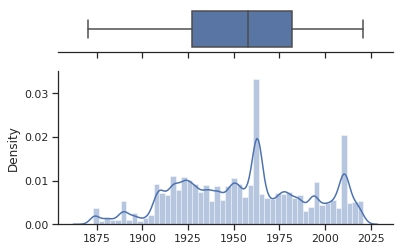

In [ ]:
def draw_boxplot_hist_from_column(data, column):
    l = data[column].tolist()
    cleanedList = [int(x) for x in l if str(x) != 'nan']
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.22, .75)})
    sns.boxplot(cleanedList, ax=ax_box)
    sns.distplot(cleanedList, ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)
    
draw_boxplot_hist_from_column(df, "AccessionYear")

From above we can see that the column doesn't have any outliers and there are two major picks around 1960 and 2010. We can see that Object Number column contains year, we can extract year from that column for missing values in AccessionYear column and fill it in.

In [ ]:
# subsetting NULL values and checking Object number column to extract year
df_null_AY = df[df['AccessionYear'].isnull()]
display(df_null_AY["Object Number"].tolist())

['Inst.68.4.1',
 'Inst.69.8.1',
 'Inst.69.8.2',
 'Inst.X.6.1',
 'Inst.1983.2',
 'Inst.1986.1',
 'X.407',
 'Inst.67.17.5',
 'Inst.67.17.6',
 'Inst.67.17.7',
 'Inst.67.17.8',
 'Inst.67.17.1a, b',
 'Inst.67.17.2a, b',
 'Inst.67.17.3a, b',
 'Inst.67.17.4a, b',
 'Inst.67.8.1',
 'Inst.67.8.2',
 'Inst.1974.357a, b',
 'X.139.1',
 'X.139.2',
 'X.139.3',
 'X.139.4',
 'X.139.5',
 'X.139.6',
 'Inst.1974.2.1',
 'Inst.67.15.1',
 'Inst.67.15.2',
 'Inst.67.15.3',
 'Inst.67.15.4a, b',
 'Inst.67.15.5a, b',
 'Inst.1976.13',
 'Inst.67.15.6a, b',
 'Inst.67.15.7a, b',
 'Inst.68.6.2',
 'X.423',
 'Inst.67.15.107',
 'Inst.67.15.108',
 'Inst.67.15.109',
 'Inst.67.15.110',
 'Inst.67.15.111',
 'Inst.67.15.112',
 'Inst.67.15.113',
 'Inst.67.15.92',
 'Inst.67.15.93',
 'Inst.67.15.94',
 'Inst.67.15.68a, b',
 'Inst.67.15.69a, b',
 'Inst.67.15.70a, b',
 'Inst.67.15.71a, b',
 'Inst.67.15.72a, b',
 'Inst.67.15.73a, b',
 'Inst.67.15.74a, b',
 'Inst.67.15.75a, b',
 'Inst.67.15.76a, b',
 'Inst.67.15.77a, b',
 'Inst.67.15.7

In [ ]:
# extracting year from the Object Number column
df_null_AY = df_null_AY[df_null_AY["Object Number"].map(lambda x: x.startswith('Inst'))]
df_null_AY["Object Number New"] = df_null_AY["Object Number"].astype("str").str.split(".").str[1]
df_null_AY = df_null_AY[df_null_AY["Object Number New"] != "X"]
df_null_AY["Object Number New"] = df_null_AY["Object Number New"].apply(lambda x: '19'+str(x) if(len(str(x)) == 2) else str(x))
display(df_null_AY["Object Number New"].tolist())

['1968',
 '1969',
 '1969',
 '1983',
 '1986',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1974',
 '1974',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1976',
 '1967',
 '1967',
 '1968',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1967',
 '1972',
 '1972',
 '1972',
 '1986',
 '1986',
 '1986',
 '1970',
 '1974',
 '1974',
 '1966',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 '1963',
 

In [ ]:
# filling Nan values in df with year extracted Object Number column
df.AccessionYear = df.AccessionYear.fillna(df_null_AY["Object Number New"])
display(df.loc[[132, 141, 142, 449, 512, 505729, 506163, 506774]])

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
Object ID                                                                     
132           Inst.68.4.1         False             False             False   
141           Inst.69.8.1         False             False             False   
142           Inst.69.8.2         False             False             False   
449           Inst.1983.2         False             False             False   
512           Inst.1986.1         False             False              True   
505729       Inst.1975.22         False             False             False   
506163     Inst.1976.1a–c         False             False             False   
506774       Inst.1978.11         False             False             False   

          Gallery Number           Department AccessionYear  \
Object ID                                                     
132                  738    The American Wing          1968   
141                  NaN    The American Wing          1969   
142                  NaN    The American Wing          1969   
449                  739    The American Wing          1983   
512                  740    The American Wing          1986   
505729               NaN  Musical Instruments          1975   
506163               NaN  Musical Instruments          1976   
506774               NaN  Musical Instruments          1978   

                      Object Name  \
Object ID                           
132        Architectural elements   
141                    Lamp shade   
142                    Lamp shade   
449                     Bell pull   
512                         Bible   
505729                     Snares   
506163             Oboe Reed Case   
506774              Violin String   

                                                       Title   Culture  ...  \
Object ID                                                               ...   
132        Architectural elements from Halsted House, Rye...  American  ...   
141                                               Lamp Shade       NaN  ...   
142                                               Lamp Shade       NaN  ...   
449                                                Bell Pull  American  ...   
512                                                    Bible   British  ...   
505729                                                Snares       NaN  ...   
506163                                        Oboe Reed Case       NaN  ...   
506774                                         Violin String       NaN  ...   

          Excavation River             Classification Rights and Reproduction  \
Object ID                                                                       
132              NaN   NaN                        NaN                     NaN   
141              NaN   NaN                        NaN                     NaN   
142              NaN   NaN                        NaN                     NaN   
449              NaN   NaN                        NaN                     NaN   
512              NaN   NaN                        NaN                     NaN   
505729           NaN   NaN  Membranophone-Accessories                     NaN   
506163           NaN   NaN      Aerophone-Accessories                     NaN   
506774           NaN   NaN                  Accessory                     NaN   

                                               Link Resource  \
Object ID                                                      
132        http://www.metmuseum.org/art/collection/search...   
141        http://www.metmuseum.org/art/collection/search...   
142        http://www.metmuseum.org/art/collection/search...   
449        http://www.metmuseum.org/art/collection/search...   
512        http://www.metmuseum.org/art/collection/search...   
505729     http://www.metmuseum.org/art/collection/search...   
506163     http://www.metmuseum.org/art/collection/search...   
506774     http://www.metmuseum.org/art/c

In [ ]:
sum(df.AccessionYear.isna())

4013

From above we can see that we successfully fillled some Nan values in AccessionYear column,though many values are still remain unfilled. In order to predict the rest of values for this column let's select only non-null values for this column separate them in to test and train data and then use different Imputation method to predict.

In [ ]:
# selecting non-null values based on AccessionYear column
df_not_null_AY = df[~df['AccessionYear'].isnull()]
display(df_not_null_AY.shape)

(472293, 52)

To predict/fill NAN AccessionYear column I will use three different methods:

1) replacement for the mean (SimpleImputer)
2) replacement for the median (SimpleImputer)
3) k-Nearest Neighbours Imputation * (not performed)

For mean/median prediction its easy as we don't need any other columns to predict the year, however for kNN we need to select some columns which could have an influence on the AccessionYear.

I think that the AccessionYear mazbe influenced by:

* Object Number
* Department
* Object Name
* Title

All these columns have the least of null values so I will use them for kNN. However before I will also extract the most important information from these columns.


In [ ]:
# let's first create series object from column I need to impute
AY_series = pd.Series(df_not_null_AY["AccessionYear"]).astype(float)
AY_series_reference = AY_series.copy()
AY_series = pd.to_numeric(AY_series, errors='coerce')
nanidx = AY_series.sample(frac=0.25).index
AY_series[nanidx] = np.NaN
AY_series

Object ID
1         1979.0
2         1980.0
3         1967.0
4         1967.0
5            NaN
           ...  
855654    1917.0
855655    1950.0
855656    1917.0
855691    1964.0
855692    1971.0
Name: AccessionYear, Length: 472293, dtype: float64

In [ ]:
from scipy import stats
print(f"Mean: {np.mean(AY_series_reference)}, median: {np.median(AY_series_reference)}, mode: {stats.mode(AY_series_reference)}")

Mean: 1955.5530782797966, median: 1958.0, mode: ModeResult(mode=array([1963.]), count=array([40277]))


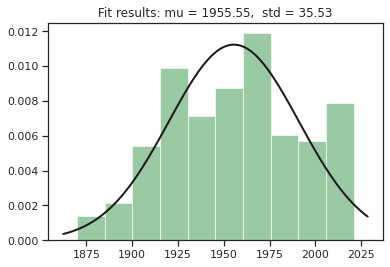

In [ ]:
from scipy.stats import norm
mu, std = norm.fit(AY_series_reference)
plt.hist(AY_series_reference, bins=10, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

From above we can see that mean/median/mode are very close to each other, we can also see that distribution of values resemble (approx) a normal distribution. I decided not to use mode (the most frequent value) to impute AccessYear column. Below we can see that we introduced 25% of Nan values which we will Impute with mean and then evaluate the efficiency of this imputation method.

In [ ]:
(AY_series.isna().sum()/len(AY_series))*100

25.0

In [ ]:
# imputing with mean
X_to_impute = AY_series.to_frame()
my_imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
X_imputed = pd.DataFrame(my_imputer.fit_transform(X_to_impute))
X_imputed.columns = X_to_impute.columns
X_imputed.index = X_to_impute.index

print('Null values count after: ', X_imputed.isna().sum())
X_imputed["AccessionYear"] = X_imputed["AccessionYear"].astype(int)
display(X_to_impute.head()) 
display(display(X_imputed.head()))

Null values count after:  AccessionYear    0
dtype: int64


AccessionYear
Object ID               
396224            1932.0
194154            1917.0
433463            1949.0
789540            1984.0
288070            2005.0

AccessionYear
Object ID               
396224              1932
194154              1917
433463              1949
789540              1984
288070              2005

None

In [ ]:
# esimating the error of imputing
round(np.sqrt(mean_squared_error(AY_series_reference.tolist(),X_imputed["AccessionYear"].tolist())),2)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


17.69

In [ ]:
# imputing with median
X_impute = AY_series.to_frame()
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
X_imputed_median = pd.DataFrame(imputer.fit_transform(X_impute))
X_imputed_median.columns = X_impute.columns
X_imputed_median.index = X_impute.index

print('Null values count after: ', X_imputed_median.isna().sum())
X_imputed_median["AccessionYear"] = X_imputed_median["AccessionYear"].astype(int)

Null values count after:  AccessionYear    0
dtype: int64


In [ ]:
# esimating the error of imputing
round(np.sqrt(mean_squared_error(AY_series_reference.tolist(),X_imputed_median["AccessionYear"].tolist())),2)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/metrics/_regression.py:90: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  y_true = check_array(y_true, ensure_2d=False, dtype=dtype)


17.7

As we can see the error by imputing missing values by the mean and the median is relatively the same. I also tried to use kNN, however i got the memory issue even for a small subset of values (50K). 

In [ ]:
df_Accession_Year = pd.DataFrame(df["AccessionYear"])
print(df_Accession_Year.isna().sum())
print(len(df_Accession_Year))
df_AY_imputed = pd.DataFrame(imputer.fit_transform(df_Accession_Year))
df_AY_imputed.columns = ["AccessionYear 2"]
df_AY_imputed["AccessionYear 2"] = df_AY_imputed["AccessionYear 2"].astype(int)
df_AY_imputed.index = df.index
print(df_AY_imputed.isna().sum())
print(len(df_AY_imputed))

merged_df = pd.merge(df, df_AY_imputed, left_index=True, right_index=True)
merged_df = merged_df.drop("AccessionYear", axis=1)
merged_df.rename(columns={'AccessionYear 2':'AccessionYear'}, inplace=True)
print(merged_df.info())

AccessionYear    4013
dtype: int64
476306
AccessionYear 2    0
dtype: int64
476306
<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            476306 non-null  object
 1   Is Highlight             476306 non-null  bool  
 2   Is Timeline Work         476306 non-null  bool  
 3   Is Public Domain         476306 non-null  bool  
 4   Gallery Number           46768 non-null   object
 5   Department               476306 non-null  object
 6   Object Name              474762 non-null  object
 7   Title                    447079 non-null  object
 8   Culture                  207065 non-null  object
 9   Period                   90812 non-null   object
 10  Dynasty                  23237 non-null   object
 11  Reign                    11225 non-null   object
 12  Portfolio                23356 non-null   obj

As we can see from above now the successfully fullfill NAN values in AccessionYear column and converted this column to the appropriate datype (from object to integer - numeric).

### Exploring "Object Number" column

<AxesSubplot:>

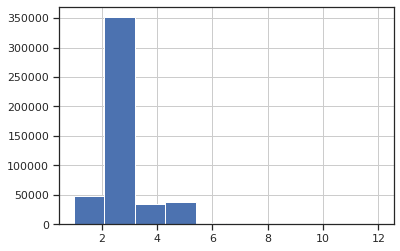

In [ ]:
df_ON = df.copy()
df_ON["Column"] = df_ON["Object Number"].str.split(".")
df_ON["Column"].head()

# let's look at the distribution of values in column Object Number
l = df_ON["Column"].str.len()
l.hist()

In [ ]:
set(df_ON["Column"].str[0].tolist())

{'JP875',
 '226 B641',
 'JP3510',
 'JP187',
 'JP768',
 'JP888',
 'JP1711',
 'JP3484',
 'JP1561',
 'JP1359',
 'JP2354',
 'JP1232',
 'JP839',
 'CP234',
 'JP108',
 'JP1506',
 'JP2962',
 'JP264',
 'JP2575',
 'JP1259',
 'CP321',
 'JP1931',
 'JP141',
 'JP2187',
 'CP88',
 'JP2986',
 'JP3071',
 'JP1330',
 'JP835',
 'JP766',
 'JP1682',
 'JIB40',
 'JP656',
 'JP2625',
 'JP3265',
 'JP696',
 'JP3426',
 'JP3191',
 'JP2359',
 'CP150',
 'JP1216',
 'JIB68',
 'JP2953',
 'N1 ',
 'JP1018',
 'JP2861',
 'X',
 'JP1916',
 'MJP40',
 'JP1423',
 'CP436',
 'JP1386',
 'JP555',
 'JIB127',
 'JP1642',
 'CP47',
 'JP1341',
 'JP2475',
 'JIB122a, b',
 'CP187',
 'JP2221',
 'JP3279',
 'JP249',
 'JP3492',
 'CP80',
 'JP3253a–c',
 'JP1742',
 'JP2992',
 'JP659',
 'JP1342a–c',
 'JP2110',
 'CP435',
 'JP3385',
 '26',
 'JP45',
 '82',
 'JP627',
 'JP3275a–c',
 'CP201',
 'JP2289',
 'JP563',
 'JP1611',
 'CP466',
 'JP65',
 'JP2610',
 'CP449',
 'JP47',
 'JP612',
 'PS2267 ',
 'AS',
 'JP2223',
 'JP2922',
 'JP639',
 'JP532',
 'Evans 9',
 '

Ok this column seems to be very complicated I wont work with it.

### Exploring boolean columns

Below I will explore boolean column which do not have any missing values in order to drop them in case:

1) all values are represented by one type of a boolean (True either False)
2) they correlate with each other

In [ ]:
bolean_df = df[["Is Highlight","Is Timeline Work","Is Public Domain"]]
display(bolean_df)

Is Highlight  Is Timeline Work  Is Public Domain
Object ID                                                  
1                 False             False             False
2                 False             False             False
3                 False             False             False
4                 False             False             False
5                 False             False             False
...                 ...               ...               ...
855654            False             False             False
855655            False             False             False
855656            False             False             False
855691            False             False              True
855692            False             False              True

[476306 rows x 3 columns]

In [ ]:
bolean_df["Is Highlight"].value_counts()

False    473850
True       2456
Name: Is Highlight, dtype: int64

In [ ]:
bolean_df["Is Timeline Work"].value_counts()

False    468324
True       7982
Name: Is Timeline Work, dtype: int64

In [ ]:
bolean_df["Is Public Domain"].value_counts()

True     245545
False    230761
Name: Is Public Domain, dtype: int64

From above we can see that columns "Is Highlight" and "Is Timeline Work" contain relatively small amount of True values. We check the correlation between both collumns and decide if should keep just one of them.

Moreover, we can see that values are consistant in these columns.

In [ ]:
bolean_df = bolean_df.drop("Is Public Domain", axis=1)
bolean_df.corr(method ='pearson')

Is Highlight  Is Timeline Work
Is Highlight          1.000000          0.287927
Is Timeline Work      0.287927          1.000000

As we can see from above, the correlation coefficient is relatively small so we can keep them as they are.

P.S: I am a bioinformatician, I am not an expert in Museums. :)

### Exploring  "Gallery Number" &amp; "Department" column ( 2.,3.)

Let's check consistency over "Gallery Number" column. We can see that this column has some inconsistant values  like 'Petrie Ct. Café', 'in Great Hall' and 'on Fifth Avenue', some values are float, others integers or string.

In [ ]:
df["Gallery Number"].unique()

array([nan, '774', '706', '724', '741', '728', '719', '718', '729', '712',
       '516', '737', '738', '701', '734', '708', '722', '713', '730',
       '752', '736', '723', '740', '732', '743', '725', '739', '745',
       '700', '704', '750', '512', '751', '717', '209', '749', '714',
       '733', '764', '710', '744', '726', '705', '731', '510', '747',
       '756', '720', '715', '721', '766', '761', '762', '754', '372',
       '773', '554', '707', '768', '771', '765', '760', '758', '759',
       '763', '681', '824', '769', '748', '753', '772', '755',
       'in Great Hall', '767', '770', '703', '735', '727', '599', '980',
       774.0, 772.0, 751.0, 705.0, 706.0, 762.0, 743.0, 770.0, 719.0,
       736.0, 731.0, 726.0, 752.0, 742.0, 717.0, 707.0, 741.0, 704.0,
       728.0, 763.0, 724.0, 599.0, 765.0, 727.0, 701.0, 747.0, 750.0,
       764.0, 730.0, 700.0, 708.0, 759.0, 732.0, 758.0, 715.0, 760.0,
       754.0, 744.0, 757.0, 378.0, 371.0, 372.0, 379.0, 375.0, 374.0,
       376.0, 999.0

In [ ]:
df["Gallery Number"] = df["Gallery Number"].replace('on Fifth Avenue', np.nan)
df["Gallery Number"] = df["Gallery Number"].replace('Petrie Ct. Café', np.nan)
df["Gallery Number"] = df["Gallery Number"].replace('in Great Hall', np.nan)

In [ ]:
df["Gallery Number"] = df["Gallery Number"].astype(float)
print(sorted(df["Gallery Number"].unique()))

[nan, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 100.0, 101.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 121.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 137.0, 138.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 173.0, 174.0, 175.0, 176.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0, 237.0, 238.0, 239.0, 240.0, 241.0, 242.0, 243.0, 244.0, 245.0, 246.0, 247.0, 248.0, 249.0, 250.0, 251.0, 252.0, 253.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 370.0, 371.0, 372

<AxesSubplot:>

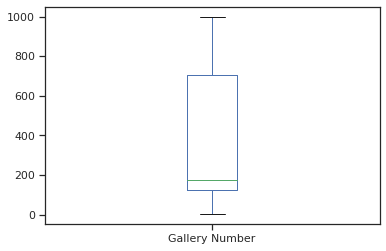

In [ ]:
df["Gallery Number"].astype(float).plot.box()

<AxesSubplot:>

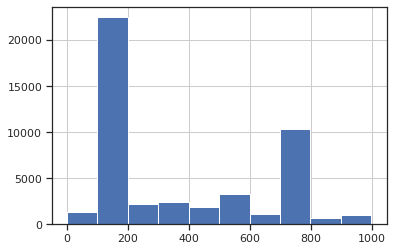

In [ ]:
df["Gallery Number"].astype(float).hist()

In [ ]:
df["Gallery Number"].isna().sum()

429549

In [ ]:
df[~df['Gallery Number'].isnull()].head()

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
Object ID                                                                   
33                64.62         False             False             False   
34           1970.289.6         False             False              True   
35              04.1a–c          True              True             False   
36             1976.319         False             False             False   
37            38.165.51         False             False              True   

          Gallery Number         Department AccessionYear Object Name  \
Object ID                                                               
33                   774  The American Wing        1964.0        Bust   
34                   774  The American Wing        1970.0       Clock   
35                   706  The American Wing        1904.0        Vase   
36                   774  The American Wing        1976.0  Side Chair   
37                   774  The American Wing        1938.0      Figure   

                                     Title                    Culture  ...  \
Object ID                                                              ...   
33                 Bust of Abraham Lincoln                   American  ...   
34                             Acorn Clock                   American  ...   
35                          The Adams Vase                   American  ...   
36                              Side Chair                   American  ...   
37         Figure of Admiral George Rodney  British (American market)  ...   

          Excavation River Classification Rights and Reproduction  \
Object ID                                                           
33               NaN   NaN            NaN                     NaN   
34               NaN   NaN            NaN                     NaN   
35               NaN   NaN            NaN                     NaN   
36               NaN   NaN            NaN                     NaN   
37               NaN   NaN            NaN                     NaN   

                                               Link Resource  \
Object ID                                                      
33         http://www.metmuseum.org/art/collection/search/33   
34         http://www.metmuseum.org/art/collection/search/34   
35         http://www.metmuseum.org/art/collection/search/35   
36         http://www.metmuseum.org/art/collection/search/36   
37         http://www.metmuseum.org/art/collection/search/37   

                               Object Wikidata URL  \
Object ID                                            
33                                             NaN   
34                                             NaN   
35         https://www.wikidata.org/wiki/Q83545838   
36                                             NaN   
37                                             NaN   

                                         Repository  \
Object ID                                             
33         Metropolitan Museum of Art, New York, NY   
34         Metropolitan Museum of Art, New York, NY   
35         Metropolitan Museum of Art, New York, NY   
36         Metropolitan Museum of Art, New York, NY   
37         Metropolitan Museum of Art, New York, NY   

                                    Tags  \
Object ID                                  
33         Men|Abraham Lincoln|Portraits   
34                      Landscapes|Boats   
35            Animals|Garlands|Birds|Men   
36                                   NaN   
37                    Cannons|Swords|Men   

                                                Tags AAT URL  \
Object ID                                                      
33         http://vocab.getty.edu/page/aat/300025928|http...   
34         http://vocab.getty.edu/page/aat/300132294|http...   
35         http://vocab.getty.edu/page/aat/300249525|http...   
36                                                       NaN   
37         http://vo

In [ ]:
df.Department.unique()

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

In [ ]:
df[df["Department"] == "The American Wing"]["Gallery Number"].unique()

array([ nan, 774., 706., 724., 741., 728., 719., 718., 729., 712., 516.,
       737., 738., 701., 734., 708., 722., 713., 730., 752., 736., 723.,
       740., 732., 743., 725., 739., 745., 700., 704., 750., 512., 751.,
       717., 209., 749., 714., 733., 764., 710., 744., 726., 705., 731.,
       510., 747., 756., 720., 715., 721., 766., 761., 762., 754., 372.,
       773., 554., 707., 768., 771., 765., 760., 758., 759., 763., 681.,
       824., 769., 748., 753., 772., 755., 767., 770., 703., 735., 727.,
       599., 980., 742., 757., 535., 746.])

(array([1.000e+01, 0.000e+00, 3.000e+00, 2.100e+01, 4.000e+00, 3.000e+00,
        2.251e+03, 7.697e+03, 0.000e+00, 1.000e+00]),
 array([209. , 286.1, 363.2, 440.3, 517.4, 594.5, 671.6, 748.7, 825.8,
        902.9, 980. ]),
 <BarContainer object of 10 artists>)

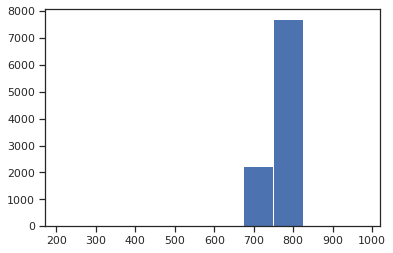

In [ ]:
m = df[df["Department"] == "The American Wing"]["Gallery Number"].tolist()
m = [int(i) for i in m if str(i) != "nan"]
plt.hist(m)

In [ ]:
df[df["Department"] == "European Sculpture and Decorative Arts"]["Gallery Number"].unique()

array([774.,  nan, 899., 556., 554., 503., 547., 535., 548., 523., 532.,
       533., 544., 307., 521., 800., 201., 552., 507., 510., 555., 551.,
       614., 553., 505., 516., 550., 617., 545., 526., 528., 522., 525.,
       531., 530., 684., 524., 306., 715., 500., 724., 512., 536.,  10.,
       710., 509., 504., 604., 534., 755., 502., 300., 605., 549., 723.,
        18., 815., 814., 816., 817., 515., 626., 511., 757., 722., 529.,
       999., 501., 608., 963., 546., 527., 704., 203., 305., 514., 825.,
       209., 539., 376., 303., 506., 464., 540., 541., 542., 537., 543.,
       538., 620., 954., 728., 753., 725., 616., 599., 513., 622., 964.,
       636., 829.])

(array([  14.,   59.,   10.,    3.,  135., 2984.,   41.,  155.,   67.,
           6.]),
 array([ 10. , 108.9, 207.8, 306.7, 405.6, 504.5, 603.4, 702.3, 801.2,
        900.1, 999. ]),
 <BarContainer object of 10 artists>)

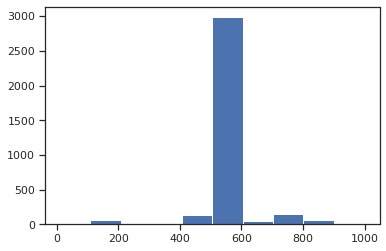

In [ ]:
k = df[df["Department"] == "European Sculpture and Decorative Arts"]["Gallery Number"].tolist()
k = [int(i) for i in k if str(i) != "nan"]
plt.hist(k)

In [ ]:
df[df["Department"] == "Asian Art"]["Gallery Number"].unique()

array([ nan, 210., 236., 222., 207., 208., 224., 215., 213., 231., 240.,
       244., 235., 237., 247., 249., 251., 248., 252., 250., 204., 238.,
       253., 464., 234., 239., 241., 245., 246., 242., 463., 243., 233.,
       205., 209., 221., 219., 206., 220., 684., 227., 203., 228., 225.,
       216., 202., 200., 201., 214., 376., 218., 229., 211., 455., 223.,
       212., 899., 718., 745., 305., 533., 531., 462., 232., 226., 599.,
       230.])

(array([2.058e+03, 1.000e+00, 1.000e+00, 2.600e+01, 5.000e+00, 3.000e+00,
        4.000e+00, 6.000e+00, 0.000e+00, 2.000e+00]),
 array([200. , 269.9, 339.8, 409.7, 479.6, 549.5, 619.4, 689.3, 759.2,
        829.1, 899. ]),
 <BarContainer object of 10 artists>)

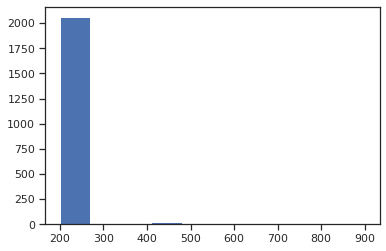

In [ ]:
l = df[df["Department"] == "Asian Art"]["Gallery Number"].tolist()
l = [int(i) for i in l if str(i) != "nan"]
plt.hist(l)

We can see that there a consistancy that the value for Gallery Number relates to department it is usually lay down in the certain range of values there are alsso some outliers which may be explained by the full capacity of all Galleries for this department or there might one year when they decided to exchange all rooms. To fill NAN values in this column I would create a dictionary with department as a key and values is a list of Gallery Numbers. I would randomly/based on frequency fill nan values from Gallery Numbers list where Department would be equal to dictionary key. At the end let's also convert this column to the appropriate datatype - category.

In [ ]:
merged_df["Department"] = merged_df.Department.astype("category")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Object Number            476306 non-null  object  
 1   Is Highlight             476306 non-null  bool    
 2   Is Timeline Work         476306 non-null  bool    
 3   Is Public Domain         476306 non-null  bool    
 4   Gallery Number           46768 non-null   object  
 5   Department               476306 non-null  category
 6   Object Name              474762 non-null  object  
 7   Title                    447079 non-null  object  
 8   Culture                  207065 non-null  object  
 9   Period                   90812 non-null   object  
 10  Dynasty                  23237 non-null   object  
 11  Reign                    11225 non-null   object  
 12  Portfolio                23356 non-null   object  
 13  Constituent ID           274152 non-null  ob

### Exploring &nbsp;Object Name feature  (2.)

For this feature we would check consistency of the values.

In [ ]:
print(df["Object Name"].unique().tolist())

['Coin', 'Peso', 'Centavos', 'Pesos', 'Bust', 'Clock', 'Vase', 'Side Chair', 'Figure', 'Advertisement', 'Ale glass', 'Andiron', 'Apothecary jar', 'Statuette', 'Frame', 'Architectural elements', 'Loggia elements', 'Bedroom', 'Argand lamp', 'Lamp shade', 'Armchair', 'Banister-back armchair', 'Drawing', 'Slat-back armchair', 'Spindle-back armchair', 'Teapot', 'Rocking chair', 'Reclining armchair', 'Folding armchair', 'Side chair', 'Revolving armchair', 'Furniture hardware', 'Astral lamp', 'Window', 'Aviary', "Baby's bottle", 'Badge', 'Baking dish', 'Balcony', 'Ball', 'Wall panel', 'Baluster', 'Banjo clock', 'Bank', 'Baptismal basin', 'Baptismal bowl', 'Baptismal certificate', 'Bottle', 'Mug', 'Keg', 'Basin', 'Wash basin', 'Basin Stand', 'Basin stand', 'Basket', 'Door', 'Oil cruet', 'Beaker', 'Pulque beaker', 'Tumbler', 'Bean pot', 'Folding bedstead', 'Bedstead', 'Bell', 'Bell pull', 'Bellows', 'Bench', 'Sleigh seat', 'Painting', 'Cameo medallion, minature', 'Mask cast', 'Medallion', 'Pain

By a quick look we can see that 'Basin Stand', 'Basin stand' and Basin relate to the same thing though written inconsistently. The same applies for 'Bureau Table' and 'Bureau table', 'Butter dish' and  'Butter Dish', 'Chest-with-drawers', 'Chest with drawers','Chest with drawer', 'Chest-with-drawer',  'Chocolate pot', 'Chocolate Pot',  'Coffee cup and saucer', 'Coffee cup saucer',  'Tobacco jar',  'Tobacco Jar', 'Cruet Stand', 'Cruet stand', 'Dressing Glass',  'Dressing glass' etc.

To clean this column, I would propose to lowercase all words in column, then to replace or dashes with space as well as /n /t/ /r should be replaced to space, then I would do strip based on space for each value in a column to get rid of spaces at the end of string. I would also made the fisrst letter with uppercase and the rest would keep as lowercase. Then I would regexp all words where were dash to visually check if the dash is required in this values, I would then use str.replace for particular cases where I removed dash though that was not the right approach to do.

### Exploring Dimensions column  (2., 8.)

Let's also check the consistancy of this column.

In [ ]:
df.Dimensions.unique().tolist()[:1000]

['Dimensions unavailable',
 'Diam. 11/16 in. (1.7 cm)',
 'Diam. 1/2 in. (1.3 cm)',
 'Diam. 1 1/8 in. (2.9 cm)',
 'Diam. 3/4 in. (1.9 cm)',
 'Diam. 2 1/8 in. (5.4 cm)',
 '2 3/4 x 3 1/2 x 2 3/4 in. (7 x 8.9 x 7 cm)',
 '24 3/8 x 14 5/8 x 5 1/8 in. (61.9 x 37.1 x 13 cm)',
 'Overall: 19 7/16 x 13 x 9 1/4 in. (49.4 x 33 x 23.5 cm); 352 oz. 18 dwt. (10977 g)\r\nBody: H. 18 7/8 in. (47.9 cm)\r\nCover: 4 1/4 x 4 13/16 in. (10.8 x 12.2 cm); 19 oz. 6 dwt. (600.1 g)',
 '40 x 25 1/2 x 34 1/2 in. (101.6 x 64.8 x 87.6 cm)',
 'H. 12 in. (30.5 cm)',
 'H. 12 3/8 in. (31.4 cm)',
 '11 x 9 in. (27.9 x 22.9 cm)',
 'H. 6 9/16 in. (16.7 cm); Diam. 3 in. (7.6 cm)',
 'H. 6 1/4 in. (15.9 cm); Diam. 2 15/16 in. (7.5 cm)',
 '30 7/8 x 25 x 13 7/8 in. (78.4 x 63.5 x 35.2 cm)',
 'H. 27 in. (68.6 cm)',
 'H. 16 in. (40.6 cm)',
 'H. 17 in. (43.2 cm)',
 'H. 11 1/2 in. (29.2 cm)',
 'H. 16 1/2 in. (41.9 cm)',
 'H. 23 in. (58.4 cm)',
 '22 1/2 x 23 in. (57.2 x 58.4 cm)',
 '25 1/4 x 21 1/2 x 13 1/2 in. (64.1 x 54.6 x 34.3 cm)

In [ ]:
df.Dimensions.isna().sum()

75295

In [ ]:
df.Dimensions

Object ID
1                            Dimensions unavailable
2                            Dimensions unavailable
3                          Diam. 11/16 in. (1.7 cm)
4                          Diam. 11/16 in. (1.7 cm)
5                          Diam. 11/16 in. (1.7 cm)
                            ...                    
855654           8 1/4 × 5 13/16 in. (21 × 14.8 cm)
855655     Sheet: 10 3/8 × 7 7/8 in. (26.4 × 20 cm)
855656    Sheet: 9 1/8 × 6 5/8 in. (23.2 × 16.8 cm)
855691         each: 8 1/8 × 6 in. (20.6 × 15.2 cm)
855692           Height (man .185): 9 in. (22.9 cm)
Name: Dimensions, Length: 476306, dtype: object

We can see that some values start with Overall or Base/Sheet, others starts with Diam which is Diameter, others with H whch is height, some other do not havew any specification if it is Height, Width or Diameter. We can also see som \r \r which should be replaced by space. Perfectly, height, width, length, diameter should be created a separate column in only one unit (in/cm). Height, width, length values could also relate to overall/backplate vs Base. We can also see given in oz and grams, it should be given in a separate column in only one unit. If another unit is required it can be recalculated to a separate column. It is better to have more consistent columns than one inconsistant column. Dimensions is unavaliable/unknown/see atached list should be replaced by np.nan as it has no meaning. Height should be represented by H. or Height as well as values in other columns as it gets confusing.

To extract the width,depth,length from the Dimensions columns I followed the order from this website - https://www.quora.com/What-order-does-width-length-and-height-go-in. I used re module to extract width/height/length.

In [ ]:
import re

tmp = df.Dimensions.tolist()
height, width, length = [], [], []
for row in tmp:
    row = str(row).lower().replace("×", "x")
    lw_regexp = '\(\s*([1-9]\d*.{0,1}\d*)\s*x\s*([1-9]\d*.{0,1}\d*)\s*cm\s*[,\)]'
    lwh_regexp = '\(\s*([1-9]\d*.{0,1}\d*)\s*x\s*([1-9]\d*.{0,1}\d*)\s*x\s*([1-9]\d*.{0,1}\d*)\s*cm\s*[,\)]'
    only_height_regexp = '(h\.|height)[^;\(\)]*\(([1-9]\d*.{0,1}\d*)\s*cm\s*\)'
    only_width_regexp = '(w\.|width)[^;\(\)]*\(([1-9]\d*.{0,1}\d*)\s*cm\s*\)'
    only_length_regexp = '(l\.|length)[^;\(\)]*\(([1-9]\d*.{0,1}\d*)\s*cm\s*\)'

    height.append(np.NaN)
    width.append(np.NaN)
    length.append(np.NaN)

    m = re.search(lwh_regexp, row)
    if m:
        height[-1],  width[-1], length[-1] = m.group(3), m.group(2), m.group(1)
        continue
    
    m = re.search(lw_regexp, row)
    if m:
        width[-1], length[-1] = m.group(2), m.group(1)
        continue
    
    m = re.search(only_height_regexp, row)
    if m:
        height[-1] = m.group(2)
        continue
    m = re.search(only_length_regexp, row)
    if m:
        length[-1] = m.group(2)
        continue
    m = re.search(only_width_regexp, row)
    if m:
        width[-1] = m.group(2)
        continue

    #print(f"\n{row}")

df["Height (cm)"], df["Width (cm)"],df["Length (cm)"] = height, width, length

df.head(100)[["Dimensions", "Height (cm)", "Width (cm)", "Length (cm)"]]


ca. 51.2 x 41.2 x 4 cm (frame)

ca. 51.2 x 41.2 x 4 cm (frame)

nan

sheet: 22.2 x 16.5 cm.

nan

height (.7): 9 11/16 in. (24.6 cm)

nan

height (.8): 9 13/16 in. (24.9 cm)

sheet: approx. 47 1/4" x 47 1/4"

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

dia. 8 1/2 in. 

dia. 8 1/2 in. 

nan

nan

nan

nan

nan

nan

nan

10 1/4 in. (26 cm)

9 5/8 in. (24.4 cm)

each 15 1/2 in. (39.4 cm)

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

framed: h: 37 in (94 cm) x w: 33 in (83.8 cm)
unframed: h: 27 in (68.6 cm) x w: 23 in (58.4 cm)

nan

nan

nan

diameter: 42 in. (106.7 cm)

10 ½" x 10"

6 1/2 in. (16.5 cm)

10 ½" x 10"

6 1/2 in. (16.5 cm)

12" length

14 in. (35.6 cm)

12 in. (30.5 cm)

sheet: 5 11/16 x 5 11/16 in. (145 x 145 mm)

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

nan

n

Dimensions Height (cm)  \
Object ID                                                                
1                                   Dimensions unavailable         NaN   
2                                   Dimensions unavailable         NaN   
3                                 Diam. 11/16 in. (1.7 cm)         NaN   
4                                 Diam. 11/16 in. (1.7 cm)         NaN   
5                                 Diam. 11/16 in. (1.7 cm)         NaN   
...                                                    ...         ...   
104             24 x 11 1/2 x 16 in. (61 x 29.2 x 40.6 cm)        40.6   
105             24 x 11 1/2 x 16 in. (61 x 29.2 x 40.6 cm)        40.6   
106        H. 22 1/2 in. (57.2 cm); Diam. 29 in. (73.7 cm)        57.2   
107        H. 22 1/2 in. (57.2 cm); Diam. 29 in. (73.7 cm)        57.2   
108         16 1/8 x 10 x 14 7/8 in. (41 x 25.4 x 37.8 cm)        37.8   

          Width (cm) Length (cm)  
Object ID                         
1                NaN         NaN  
2                NaN         NaN  
3                NaN         NaN  
4                NaN         NaN  
5                NaN         NaN  
...              ...         ...  
104             29.2         61   
105             29.2         61   
106              NaN         NaN  
107              NaN         NaN  
108             25.4         41   

[100 rows x 4 columns]

### Exploring "Artist ULAN URL" column (2.)

Let's also check consistency of Artist ULAN URL column

In [ ]:
print(df ["Artist ULAN URL"].unique().tolist())

['http://vocab.getty.edu/page/ulan/500011409', 'http://vocab.getty.edu/page/ulan/500077295', nan, 'http://vocab.getty.edu/page/ulan/500095555', 'http://vocab.getty.edu/page/ulan/500336597|http://vocab.getty.edu/page/ulan/500330306', 'http://vocab.getty.edu/page/ulan/500100483', 'http://vocab.getty.edu/page/ulan/500356007', 'http://vocab.getty.edu/page/ulan/500017620', 'http://vocab.getty.edu/page/ulan/500030415|http://vocab.getty.edu/page/ulan/500331512', 'http://vocab.getty.edu/page/ulan/500002702', 'http://vocab.getty.edu/page/ulan/500030415', '(not assigned)', 'http://vocab.getty.edu/page/ulan/500023972', 'http://vocab.getty.edu/page/ulan/500331018', 'http://vocab.getty.edu/page/ulan/500088027', 'http://vocab.getty.edu/page/ulan/500034377', 'http://vocab.getty.edu/page/ulan/500071541', 'http://vocab.getty.edu/page/ulan/500070225', 'http://vocab.getty.edu/page/ulan/500274670', 'http://vocab.getty.edu/page/ulan/500005428', 'http://vocab.getty.edu/page/ulan/500059532', 'http://vocab.ge

In [ ]:
df ["Artist ULAN URL"].isna().sum()

257178

In [ ]:
df["Artist ULAN URL"]

Object ID
1           http://vocab.getty.edu/page/ulan/500011409
2           http://vocab.getty.edu/page/ulan/500077295
3                                                  NaN
4                                                  NaN
5                                                  NaN
                              ...                     
855654     http://vocab.getty.edu/page/ulan/500119657|
855655    |http://vocab.getty.edu/page/ulan/500124636|
855656      http://vocab.getty.edu/page/ulan/500002901
855691      http://vocab.getty.edu/page/ulan/500332807
855692      http://vocab.getty.edu/page/ulan/500332807
Name: Artist ULAN URL, Length: 476306, dtype: object

As we can see from above the dataset contains (not assigned) or "|" (pipe, in some cases more than one pipe) value which should be replaced by np.nan. We can also see that pipe used as a separator when one artist has more than one URL, however some values have pipe at the start or at the end of URL message (or both sides). These inconsistancies should be striped. In some cases we can see that there are two pipes used as a separator, it is not consistant separator should be unique for the whole column.

### Exploring "Artist Suffix" column  (2.)

Let's have a look at the column Artist Suffix.

In [ ]:
df["Artist Suffix"]

Object ID
1              
2              
3           NaN
4           NaN
5           NaN
          ...  
855654       | 
855655     | | 
855656         
855691         
855692         
Name: Artist Suffix, Length: 476306, dtype: object

In [ ]:
df["Artist Suffix"].isna().sum()

202202

In [ ]:
print(df["Artist Suffix"].unique().tolist())

[' ', nan, ' | ', ' | | ', 'or| ', ' | | | | ', ' | | | ', ' |or| ', ' |or', 'Tradition', ', at his Cobridge Pottery', ' | |, Flushing', ' |, Shawnee-on-Delaware', ')| |or', ', upholsterer', 'or| |or', ', active 1760s', ' | |or', 'or| | ', ' | | | | | | | | | | | | | | | | | | | | | | | | ', ', Philadelphia', ' |1858-1932| ', '(1786-1829)', 'or| | | ', ', New York, NY', ', Berks County, PA', ', Centre County, PA', ', Morris County, New Jersey', ', American (1815-1897)', ', and his brothers', 'in The Metropolitan Museum of Art, Armor Workshop| ', 'in the Metropolitan Museum of Art, Armor Workshop| ', ', published in Antwerp in 1564.', 'in the Metropolitan Museum of Art, Armor Workshop', 'by Gotō Mitsuyoshi| | | ', ' |,  in The Metropolitan Museum of Art, Armor Workshop', ' | |(1st or 2nd generation)', ', after Yasuchika', ', or Joseph or William Grice, British, Birmingham', 'at the Metropolitan Museum of Art, Armor Workshop| ', ', or by William Green, British, London, recorded 1723', ' 

As we can see from above this column contains many pipes that should be stripped (left/right strip), some values starts with comma, "and", "for", ")"  which is inconsistant. There are values with only a question mark which should be replaced by np.nan. There are also values with empty space, that should be replaced by np.nan. I think this column is pretty hard to clean the best way might be to use regexp.

### Exploring "Object Begin Date" &amp; "Object End Date" columns (3.,4.,5.)

Let's now look at the integrity of the values in column "Object Begin Date" & "Object End Date". I chose these two columns for integrity check as I suggest that start date is usually before the end date. With pandas logical operator we can check it.

In [ ]:
df["Object Begin Date"]

Object ID
1         1853
2         1901
3         1909
4         1909
5         1909
          ... 
855654    1635
855655    1801
855656      19
855691    1755
855692    1755
Name: Object Begin Date, Length: 476306, dtype: int64

In [ ]:
print(sorted(df["Object Begin Date"].unique().tolist()))

[-400000, -300050, -240000, -95000, -90000, -12500, -11000, -10025, -10000, -8000, -7500, -7250, -7000, -6900, -6800, -6600, -6500, -6000, -5999, -5800, -5700, -5600, -5500, -5305, -5300, -5005, -5000, -4999, -4600, -4505, -4500, -4400, -4300, -4200, -4100, -4005, -4000, -3999, -3985, -3980, -3900, -3850, -3805, -3800, -3750, -3705, -3700, -3650, -3600, -3550, -3505, -3500, -3450, -3400, -3300, -3200, -3105, -3100, -3095, -3050, -3013, -3005, -3000, -2999, -2960, -2949, -2900, -2880, -2850, -2800, -2750, -2705, -2700, -2686, -2650, -2649, -2630, -2600, -2599, -2575, -2551, -2550, -2528, -2520, -2505, -2500, -2490, -2475, -2465, -2458, -2450, -2446, -2420, -2400, -2381, -2375, -2353, -2350, -2345, -2325, -2323, -2320, -2300, -2289, -2255, -2250, -2246, -2217, -2205, -2200, -2160, -2150, -2140, -2124, -2120, -2112, -2110, -2108, -2107, -2105, -2103, -2100, -2094, -2090, -2080, -2060, -2059, -2054, -2052, -2051, -2050, -2049, -2048, -2046, -2045, -2044, -2043, -2042, -2041, -2040, -2039, 

In [ ]:
print(sorted(df["Object End Date"].unique().tolist()))

[-240000, -125000, -40000, -35000, -9300, -7000, -6400, -6000, -5800, -5500, -5400, -5000, -4975, -4500, -4495, -4400, -4300, -4200, -4095, -4000, -3900, -3865, -3850, -3800, -3750, -3700, -3650, -3600, -3595, -3550, -3500, -3495, -3450, -3400, -3350, -3330, -3300, -3200, -3100, -3050, -3000, -2999, -2960, -2950, -2949, -2900, -2880, -2800, -2770, -2750, -2700, -2695, -2686, -2650, -2649, -2630, -2600, -2575, -2551, -2550, -2528, -2520, -2500, -2494, -2490, -2475, -2465, -2458, -2450, -2420, -2400, -2389, -2381, -2375, -2353, -2350, -2345, -2323, -2300, -2291, -2289, -2255, -2250, -2246, -2200, -2195, -2193, -2152, -2150, -2124, -2120, -2110, -2108, -2107, -2105, -2103, -2100, -2095, -2090, -2080, -2075, -2060, -2059, -2054, -2052, -2051, -2050, -2049, -2048, -2047, -2045, -2044, -2043, -2042, -2041, -2040, -2039, -2038, -2037, -2034, -2030, -2029, -2028, -2027, -2025, -2010, -2004, -2000, -1991, -1990, -1988, -1984, -1981, -1980, -1976, -1975, -1971, -1962, -1961, -1954, -1953, -1952,

We can see from above that values for these columns require conversion to datetime.

In [ ]:
df_datetime = df.copy()
df_datetime["OBD"] = (pd.to_datetime(df_datetime["Object Begin Date"])-pd.to_timedelta(df_datetime["Object Begin Date"], unit = 'D'))
df_datetime['year start'] = df_datetime["OBD"].dt.year
print(sorted(df_datetime['year start'].unique().tolist()))

[1896, 1956, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1997, 2000, 2004, 2042, 2206, 2216, 2230]


In [ ]:
df_datetime["OED"] = (pd.to_datetime(df_datetime["Object End Date"])-pd.to_timedelta(df_datetime["Object End Date"], unit = 'D'))
df_datetime['year end'] = df_datetime["OED"].dt.year
print(sorted(df_datetime['year end'].unique().tolist()))

[1727, 1928, 1962, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1989, 1995, 2042, 2065, 2079]


After conversion we can check integrity of column "Object Begin Date" against "Object End Date" column. We will use logical comparison operator "le" to find out if "Object Begin Date" column is less than equal "Object End Date" column.

In [ ]:
df_datetime['Integrity'] = df_datetime['year start'].le(df_datetime['year end'])
df_datetime['Integrity'].value_counts()

True     387981
False     88325
Name: Integrity, dtype: int64

We can see from above that there are 88325 values for which end date is smaller than start date. To fix this, I might switch Object Start Date and Object End Date for values where Integrity == False. Though the task was only to check the integrity but not fixing the values. Let's add consistant values to final dataframe (with no Nan values at AccessionYear column).

In [ ]:
df_datetime = df_datetime[["year start", 'year end']]
merged_df = pd.merge(df, df_datetime, left_index=True, right_index=True)
merged_df = merged_df.drop(["Object Begin Date", "Object End Date"], axis=1)
merged_df.rename(columns={"year start":'Object Begin Date', "year end":'Object End Date'}, inplace=True)
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Object Number            476306 non-null  object
 1   Is Highlight             476306 non-null  bool  
 2   Is Timeline Work         476306 non-null  bool  
 3   Is Public Domain         476306 non-null  bool  
 4   Gallery Number           46757 non-null   object
 5   Department               476306 non-null  object
 6   AccessionYear            472293 non-null  object
 7   Object Name              474762 non-null  object
 8   Title                    447079 non-null  object
 9   Culture                  207065 non-null  object
 10  Period                   90812 non-null   object
 11  Dynasty                  23237 non-null   object
 12  Reign                    11225 non-null   object
 13  Portfolio                23356 non-null   object
 14  Constituent ID      

We can now see that columns "Object Begin Date" and "Object End Date" are also converted to appropriate datatype. Let's also check if these columns have outliers.

<AxesSubplot:>

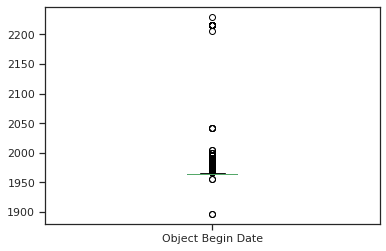

In [ ]:
merged_df["Object Begin Date"].plot.box()

<AxesSubplot:>

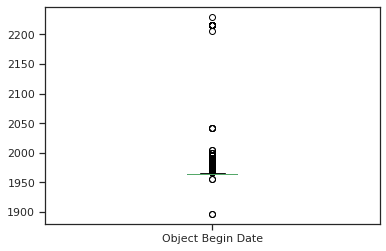

In [ ]:
merged_df["Object Begin Date"].plot.box()

From above we can see that these two columns have outliers. Let's find them not only with boxplot but also by IQR.

In [ ]:
df_obd_oed = merged_df[["Object Begin Date","Object End Date"]]
df_obd_oed.describe()

Object Begin Date  Object End Date
count      476306.000000    476306.000000
mean         1965.876443      1965.593205
std             3.528718         2.841506
min          1896.000000      1727.000000
25%          1964.000000      1964.000000
50%          1965.000000      1964.000000
75%          1965.000000      1965.000000
max          2230.000000      2079.000000

In [ ]:
def find_outlier(x):
    import math
    q1, q3 = 1964, 1965
    l1 = q1 - 1.5*(q3-q1)
    l3 = math.ceil(q3 + 1.5*(q3-q1))
    value = 'IQR value'
    if ((x> int(l3)) or (x<int(l1))):
        value = "Outlier"
    return value

df_obd_oed["Outlier OBD"] = df_obd_oed["Object Begin Date"].apply(find_outlier)
df_obd_oed["Outlier OED"] = df_obd_oed["Object End Date"].apply(find_outlier)
df_obd_oed

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Object Begin Date  Object End Date Outlier OBD Outlier OED
Object ID                                                            
1                       1964             1964   IQR value   IQR value
2                       1964             1964   IQR value   IQR value
3                       1964             1964   IQR value   IQR value
4                       1964             1964   IQR value   IQR value
5                       1964             1964   IQR value   IQR value
...                      ...              ...         ...         ...
855654                  1965             1965   IQR value   IQR value
855655                  1965             1965   IQR value   IQR value
855656                  1969             1969     Outlier     Outlier
855691                  1965             1965   IQR value   IQR value
855692                  1965             1965   IQR value   IQR value

[476306 rows x 4 columns]

In [ ]:
df_obd_oed["Outlier OED"].value_counts()

IQR value    396125
Outlier       80181
Name: Outlier OED, dtype: int64

In [ ]:
df_obd_oed["Outlier OBD"].value_counts()

IQR value    392555
Outlier       83751
Name: Outlier OBD, dtype: int64

In my view, some values like 1969 are not real outliers, they just do not fall into the 1.5IQR range. However values above 2200 and below 1900 might be outliers as they are too far from 1.5IQR. 

### Exploring "Artist Begin Date" &amp; "Artist End Date"  columns 

I thought it might be a good idea , to check integrity of these two columns as we have the same expectation that begin date should be before the end date, though we can see that this column is inconsistant, it contains few year values in one value, I am not sure which year should be selected for comparison so I decided to search for a different column for integrity check.

In [ ]:
df["Artist End Date"].unique().tolist()[:100]

['1869      ',
 '1844      ',
 nan,
 '1917      ',
 '1930      ',
 '1853      ',
 '1927      |9999      ',
 '1932      ',
 '1795      ',
 '1888      ',
 '          ',
 '1815      ',
 '1828      ',
 '1820      ',
 '1818      ',
 '1933      |1902      ',
 '1906      ',
 '1872      ',
 '1933      ',
 '9999      ',
 '1925      ',
 '1743      ',
 '1899      ',
 '1898      ',
 '1826      ',
 '1902      ',
 '1750      ',
 '1921      ',
 '1873      ',
 '1926      ',
 '1887      ',
 '1897      ',
 '1811      ',
 '1859      ',
 '1819      ',
 '1854      ',
 '1910      ',
 '1886      ',
 '1959      ',
 '1893      ',
 '1835      ',
 '1863      |1865      ',
 '1865      |1863      ',
 '1954      ',
 '1932      |1953      ',
 '1851      ',
 '1825      ',
 '1924      ',
 '          |1924      ',
 '1924      |1900      ',
 '1924      |9999      |1900      ',
 '1833      ',
 '1864      ',
 '1816      ',
 '1758      ',
 '1852      ',
 '1834      ',
 '1801      |1864      ',
 '1809      ',
 '1849      ',

In [ ]:
df["Artist Begin Date"].unique().tolist()[:100]

['1794      ',
 '1785      ',
 nan,
 '1867      ',
 '1861      ',
 '1835      ',
 '1859      |1837      ',
 '1885      ',
 '1765      ',
 '1818      ',
 '          ',
 '1736      ',
 '1803      ',
 '1797      ',
 '1787      ',
 '1734      ',
 '1848      |1892      ',
 '1853      ',
 '1810      ',
 '1848      ',
 '1750      ',
 '1856      ',
 '1704      ',
 '1845      ',
 '1830      ',
 '1740      ',
 '1770      ',
 '1723      ',
 '1864      ',
 '1897      ',
 '1773      ',
 '1824      ',
 '1877      ',
 '1757      ',
 '1833      ',
 '1874      ',
 '1779      ',
 '1859      ',
 '1836      ',
 '1813      ',
 '1829      ',
 '1804      |1854      ',
 '1854      |1804      ',
 '1801      ',
 '1875      ',
 '1902      |1857      ',
 '1784      ',
 '1816      ',
 '1754      ',
 '          |1856      ',
 '1856      |1844      ',
 '1856      |1868      |1844      ',
 '1783      ',
 '1825      ',
 '1774      ',
 '1688      ',
 '1786      ',
 '1746      |1774      ',
 '1751      ',
 '1749      ',

### Exploring "Country" &amp; "Artist Nationality " column

For integtrity check I thought I may check if nationality is the same as country though I decided not to do this integrity check as the Artist may change his Nationality diring life or work for another country.

In [ ]:
print(df.Country.unique().tolist())

[nan, 'Mexico', 'Guatemala', 'United States', 'England', 'Spain', 'United States|England', 'Netherlands', 'United States|United States', 'France', 'Canada', 'United States|France', 'England|France', 'China', 'Italy', 'Japan', 'Germany', 'Netherlands|Netherlands', 'Czech Republic', 'England|Ireland', 'Ireland|United States', 'Venezuela', 'England|Netherlands', 'England|Belgium', 'France|Italy', 'Bermuda', 'Ireland', 'India', 'England|United States', 'United States|United States|United States', 'France|NEW ZEALAND ROTORUA WHAKAREWAREWA', 'China|NEW ZEALAND ROTORUA WHAKAREWAREWA', 'Germany|Italy', 'Lisez et propagez nos Annales: "L\'Immacul‚e"', 'France|Bernard Turner', 'France|Harold Copping', 'Czech Republic|England', 'Belgium|France', 'Belgium|England|France', 'United States|Germany', 'France|Germany', 'Scotland', 'Germany|Czech Republic', 'Holland', 'England|England', 'United States|Denmark', 'Finland|Denmark|United States', 'United States|China', 'China|India', 'United States|Wales',

In [ ]:
df_Country = df[~df['Country'].isnull()]
df_nationality = df_Country[~df_Country['Artist Nationality'].isnull()]
df_cn = df_nationality[["Artist Nationality", "Country"]]
df_cn["Artist Nationality"] = df_cn["Artist Nationality"].str.replace("|", " ", regex=True)
df_cn["Country"] = df_cn["Country"].str.replace("USA", "United States")
df_cn_a = df_cn[df_cn['Artist Nationality'].apply(lambda x: len(x.strip(" ")) > 3)]
print(df_cn_a['Artist Nationality'].unique().tolist())

['American', 'French', 'American  ', 'German (Stuttgart, principality of Württemberg)', 'Scottish', 'American American', 'American   American', '    American   American', '  American', 'Italian', 'British  ', '  British', 'American    ', '    American', '      American', 'British, Scottish', 'Italian  ', 'British', 'Scottish  ', '  Scottish', 'British British', '  German', 'Dutch  ', '  Dutch', 'French  ', '  American and French', 'German (Prussian)', 'American, born Germany  ', '  French', 'American, born England', 'French British, Scottish', 'American, born England  ', 'American, born Germany', '  American, born Russia', 'British    ', '  American and French American', 'Belgian', 'French French', 'Hungarian', 'British, Scottish French', '  American  ', 'Roman British', 'Scottish American', 'Scottish    ', '    Scottish', 'American French', '  American, born Germany', 'German  ', 'German', '  American, born Austria', 'American, born Germany    ', 'American British', 'Norwegian', 'Fran

### Exploring "Country" &amp; "City" columns (3.)

Then I decided to check if city values are in the country or there is an issue with integrity of the data.

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


(array([9.628e+03, 1.076e+03, 6.777e+03, 1.310e+02, 2.310e+02, 2.500e+02,
        1.400e+01, 1.100e+01, 1.300e+01, 9.000e+00]),
 array([ 4. ,  8.2, 12.4, 16.6, 20.8, 25. , 29.2, 33.4, 37.6, 41.8, 46. ]),
 <BarContainer object of 10 artists>)

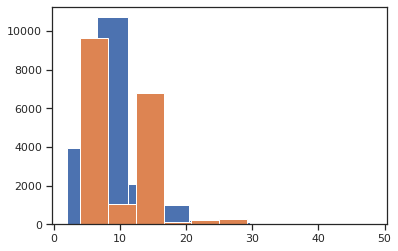

In [ ]:
df_city = df[~df['City'].isnull()]
df_country = df_city[~df_city['Country'].isnull()]
df_cc = df_country[["City", "Country"]].dropna()
df_cc.City = df_cc.City.str.replace(r"\sor\s","|", regex=True).str.replace(r"\sand\s","|", regex=True)
df_cc.Country = df_cc.Country.str.replace(r"\sor\s","|", regex=True).str.replace(r"\sand\s","|", regex=True)
df_cc["Country"] = df_cc["Country"].str.replace("USA", "United States").str.replace("U.S.A", "United States")
plt.hist(df_cc["City"].str.len().tolist())
plt.hist(df_cc["Country"].str.len().tolist())

In [ ]:
df_cc[df_cc.Country.apply(lambda x: len(str(x))>=20)]

City                      Country
Object ID                                                       
147                      Portsmouth  United States|United States
151                          Boston  United States|United States
186                      Portsmouth  United States|United States
200              Boston|Charlestown  United States|United States
265                  New York|Paris         United States|France
...                             ...                          ...
632808                 Boston|Salem  United States|United States
669898      St. Petersburg|New York         Russia|United States
718142     University City|Syracuse  United States|United States
812612       Trenton|East Liverpool  United States|United States
846764                       Boston  United States|United States

[571 rows x 2 columns]

In [ ]:
df_cc[df_cc.City.apply(lambda x: len(str(x))>=15)]

City                      Country
Object ID                                                     
179           Boston|Philadelphia                United States
200            Boston|Charlestown  United States|United States
383             Hartford|New York  United States|United States
406            Barnstable|Bristol  United States|United States
516           Dordrecht|Amsterdam      Netherlands|Netherlands
...                           ...                          ...
823142          probably Istanbul                       Turkey
823285         Lucknow (probably)                        India
823311      Los Angeles|Claremont                United States
845837            Mariwai village             Papua New Guinea
852660     Santa Cruz de Tenerife                        Spain

[1801 rows x 2 columns]

In [ ]:
df_cc[df_cc.City.str.contains("probably") == True]

City    Country
Object ID                                   
32832            probably Bologna      Italy
311367     probably Pupis village  Indonesia
311368     probably Pupis village  Indonesia
311423     probably Pupis village  Indonesia
311424     probably Pupis village  Indonesia
...                           ...        ...
751564          probably Istanbul     Turkey
781487               probably Goa      India
781855           probably Lucknow      India
823142          probably Istanbul     Turkey
823285         Lucknow (probably)      India

[515 rows x 2 columns]

In [ ]:
df_cc.City = df_cc.City.str.replace("probably", "").str.replace("near", "").str.replace("possibly", "")
df_cc.Country = df_cc.Country.str.replace("[P|p]resent-day", "").str.replace("probably", "").replace("modern-day", "")
df_cc_cc = df_cc[df_cc.City.apply(lambda x: len(x.split("|"))>1)]
df_cc_cc.City = df_cc_cc.City.str.split("|")
df_cc_cc.Country = df_cc_cc.Country.str.split("|")
df_cc_cc['Help_column'] = list(range(1,len(df_cc_cc)+1))

# below I will try to "explode" both columns City and country to have every row for each value
#| City       | Country           |
#|------------|-------------------|
#| ["A", "B"] | ["France", "USA"] |

#| City | Country  |
#|------|----------|
#| "A"  | "France" |
#| "B"  | "USA"    |


df_cc_cc = df_cc_cc.set_index('Help_column').apply(lambda x: x.apply(pd.Series).stack()).reset_index().drop('level_1', 1)
df_cc_cc.Country = df_cc_cc.Country.fillna(method="ffill")
df_cc_cc = df_cc_cc.dropna().drop("Help_column", axis=1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_cc_xcc = df_cc[df_cc.Country.apply(lambda x: len(x.split("|"))>1)]
df_cc_xcc = df_cc_xcc[~df_cc_xcc.City.apply(lambda x: len(x.split("|"))>1)]
df_cc_xcc.Country = df_cc_xcc.Country.str.split("|")
df_cc_xcc = df_cc_xcc.explode("Country").drop_duplicates()
df_cc_xcc.head(50)

City                            Country
Object ID                                                           
147                    Portsmouth                      United States
151                        Boston                      United States
735                   New Bedford                      United States
735                   New Bedford                            England
1498                   Pittsburgh                      United States
1922                   Marshfield                      United States
2051                 Philadelphia                      United States
2141                 Philadelphia                            England
2551                        Paris                             France
2551                        Paris  NEW ZEALAND ROTORUA WHAKAREWAREWA
3051                        Paris                     Bernard Turner
3056                        Paris                     Harold Copping
3189                      Limoges                      United States
3189                      Limoges                             France
3294                   Cincinnati                      United States
3294                   Cincinnati                            Germany
4284                     New York                      United States
4550                    Braintree                      United States
4902                       Albany                      United States
4902                       Albany                            Germany
5761                    Baltimore                      United States
6099                      Chicago                      United States
6099                      Chicago                             France
7938                      Manheim                      United States
9299                       Venice                              Italy
9299                       Venice                      United States
13829                    New York                             France
13829                    New York                              Tibet
13853                   Thomaston                      United States
13853                   Thomaston                            England
197089                     Madrid                              Spain
197089                     Madrid                             Mexico
202998                      Quito                            Ecuador
202998                      Quito                               Peru
204303                  Quito (?)                            Ecuador
310838             Possibly Bouna                      Côte d'Ivoire
310838             Possibly Bouna                       Burkina Faso
311034            Bamboma village                             Angola
311034            Bamboma village   Democratic Republic of the Congo
312179     Cape Palmas region (?)                      Côte d'Ivoire
312179     Cape Palmas region (?)                            Liberia
316806         Nomo Hoshu village                       South Africa
316806         Nomo Hoshu village                          Swaziland
319544                   Walmetki                   Papua New Guinea
320053     Chiloango River region              Republic of the Congo
320053     Chiloango River region                    Cabinda, Angola
445202                   Valencia                              Spain
445202                   Valencia                              Egypt
446288                    Baghdad                               Iraq
446288                    Baghdad                    Northern Jazira

In [ ]:
df_ncc = df_cc[~df_cc.City.apply(lambda x: len(x.split("|"))>1)]
df_ncc = df_ncc[~df_ncc.Country.apply(lambda x: len(x.split("|"))>1)]
city_country_df = df_ncc.append(df_cc_cc).append(df_cc_xcc).reset_index()
city_country_df['City'] = city_country_df['City'].str.replace(r"\(.*\)","").str.replace(r"\[.*\]","")
city_country_df['Country'] = city_country_df['Country'].str.replace(r"\(.*\)","").str.replace(r"\[.*\]","")
city_country_df.City = city_country_df.City.str.replace("area", "").str.replace("region", "").str.replace("village", "")
city_country_df.City = city_country_df.City.str.replace("Island", "").str.replace("River", "").str.replace("District", "").str.replace("Valley", "")
city_country_df.City = city_country_df.City.str.strip().str.strip("?")
city_country_df.Country = city_country_df.Country.str.strip().str.strip("?").str.strip("or").str.strip(".")
city_country_df.Country = city_country_df.Country.str.replace("the Netherlands", 'Netherlands').str.replace("NEW ZEALAND ROTORUA WHAKAREWAREWA", 'New Zealand')
city_country_df.Country = city_country_df.Country.str.replace("Canada: N.A", 'Canada').str.replace("France:N", 'France')
city_country_df.City = city_country_df.City.str.replace("New York", 'New York City')
city_country_df

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


index           City         Country
0          33   Philadelphia   United States
1          34        Bristol   United States
2          35  New York City   United States
3          36        Lebanon   United States
4          39        Norwich   United States
...       ...            ...             ...
18719  502277     Lambayeque            Peru
18720  503507         Dublin         Ireland
18721  503507         Dublin  United Kingdom
18722  506810          Konya          Turkey
18723  506810          Konya           India

[18724 rows x 3 columns]

(array([7.398e+03, 3.054e+03, 9.430e+02, 6.513e+03, 7.730e+02, 2.500e+01,
        7.000e+00, 1.000e+00, 0.000e+00, 1.000e+01]),
 array([ 3. ,  5.8,  8.6, 11.4, 14.2, 17. , 19.8, 22.6, 25.4, 28.2, 31. ]),
 <BarContainer object of 10 artists>)

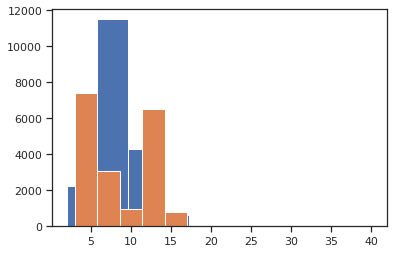

In [ ]:
plt.hist(city_country_df.City.str.len())
plt.hist(city_country_df.Country.str.len())

In [ ]:
city_country_df[city_country_df.City.apply(lambda x: len(str(x))>=15)]

index                  City        Country
541     1467       South Kingstown  United States
703     1769       Hitchcocksville  United States
704     1770       Hitchcocksville  United States
1582    3672       North Attleboro  United States
1998    4937       North Attleboro  United States
...      ...                   ...            ...
18527   1240       al-Muhammadiyya           Iran
18529   1242       al-Muhammadiyeh           Iran
18591   1304      Sulu Archipelago    Philippines
18592   1305  Lluchmajor, Mallorca          Spain
18608   1321       University City  United States

[255 rows x 3 columns]

In [ ]:
sorted(city_country_df["City"].unique().tolist())

['A-Rayy',
 'Aachen',
 'Abar shahr',
 'Abeokuta',
 'Abeokuta , Itoko quarter',
 'Abomey',
 'Absam',
 'Abu Mena',
 'Adorf',
 'Agani',
 'Agirigi',
 'Agra',
 'Agwa',
 'Ahmadabad',
 'Ahmadnagar',
 'Ahmedabad',
 'Ahnas',
 'Ahoada',
 'Aibom',
 'Ain et-Turba',
 'Aitape',
 'Ajmer',
 'Aketa',
 'Akhmim',
 'Akhmin',
 'Akpa',
 'Akwa',
 'Akwete',
 'Albany',
 'Alcaraz',
 'Alençon',
 'Aleppo',
 'Alexandria',
 'Alfred',
 'Algiers',
 'Allentown',
 'Allgäu',
 'Alloway',
 'Allowaystown',
 'Almeria',
 'Altenberg-an-der-Lahn',
 'Altona',
 'Amanamkai',
 'Amasya',
 'Ambisu',
 'Ambonwari',
 'Amehta',
 'Amiens',
 'Amok',
 'Amritsar',
 'Amsterdam',
 'Amul',
 'Amul, Hamadan',
 'Andkhoi',
 'Andover',
 'Angers',
 'Angoram',
 'Angriman',
 'Anna',
 'Annapolis',
 'Antinoe',
 'Antinopolis',
 'Antsahatsiroa',
 'Antwerp',
 'Appledore',
 'Apulia,  Troia',
 'Aqcheh',
 'Aragon',
 'Arbil',
 'Arezzo',
 'Argyrokastro',
 'Aribinda city , Idrissa',
 'Arminya',
 'Arrajan',
 'Arrijan',
 'Arthur',
 'Arusha',
 'Ashburnham',
 'Asir'

In [ ]:
print(sorted(city_country_df["Country"].unique().tolist()))

['Afghanistan', 'Alamania', 'Albania', 'Algeria', 'America', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Austrian', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Benin', 'Bernard Turne', 'Bohemia', 'Bolivia', 'Borne', 'Bosnia', 'Bosnia - Herzegovina', 'Brazil', 'Bulgaria', 'Burkina Fas', 'Byzantine Egypt', 'Cabinda, Angola', 'Cameroon', 'Canada', 'Caucasus', 'Central', 'Central Asia', 'Central Italy', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', "Côte d'Ivoire", 'Democratic Republic of the Cong', 'Dominican Republic', 'Ecuad', 'Egypt', 'England', 'Ethiopia', 'Fiji', 'Finland', 'Flanders', 'Flemish', 'France', 'French', 'Friesland', 'Gabon', 'Georgia, Republic of', 'Germany', 'Ghana', 'Greece', 'Harold Copping', 'Haute Garonne', 'Herzegovina', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Japan', 'Kenya', 'Korea', 'Kosova', 'Lebanon', 'Liberia', 'Lower Austria', 'Macedonia', 'Madaga

In [ ]:
city_country_df[city_country_df.City.apply(lambda x: len(str(x))<=3)]

index City        Country
37        132  Rye  United States
5801   310452  Epe        Nigeria
5845   310887  Per      Indonesia
5866   310971  San           Mali
5867   310972  San           Mali
...       ...  ...            ...
16992  781487  Goa          India
17635     347  Rye  United States
17720     432  Upu        Nigeria
17822     534  Kus          Egypt
18471    1184  Jay           Iran

[86 rows x 3 columns]

So I tried to clean the data as much as I can there are still some inconsistansies in spelling of some names. It may take too much time for me to make it perfect. In order to check if city is situated in the country we will use an external dataset from datahub.io. Let's load it to our environment.

In [ ]:
ex_city_df = pd.read_csv('https://datahub.io/core/world-cities/r/world-cities.csv')
ex_city_df = ex_city_df.drop(["subcountry", "geonameid"], axis=1)
ex_city_df

name               country
0          les Escaldes               Andorra
1      Andorra la Vella               Andorra
2        Umm al Qaywayn  United Arab Emirates
3        Ras al-Khaimah  United Arab Emirates
4          Khawr Fakkān  United Arab Emirates
...                 ...                   ...
23013          Bulawayo              Zimbabwe
23014           Bindura              Zimbabwe
23015        Beitbridge              Zimbabwe
23016           Epworth              Zimbabwe
23017       Chitungwiza              Zimbabwe

[23018 rows x 2 columns]

In [ ]:
integrity_df = pd.merge(city_country_df, ex_city_df, left_on="City", right_on="name", how="left").drop_duplicates()
integrity_df["Integrity"] = integrity_df.Country == integrity_df.country

In [ ]:
integrity_df["Integrity"].value_counts()

False    12893
True      7710
Name: Integrity, dtype: int64

In [ ]:
integrity_df[integrity_df["Integrity"] == False]

index            City         Country     name         country  \
1          34         Bristol   United States  Bristol  United Kingdom   
11         39         Norwich   United States  Norwich  United Kingdom   
12         40  East Cambridge   United States      NaN             NaN   
27        110          Boston   United States   Boston  United Kingdom   
29        111          Boston   United States   Boston  United Kingdom   
...       ...             ...             ...      ...             ...   
22182  501559       Mirecourt         Germany      NaN             NaN   
22185  503507          Dublin         Ireland   Dublin   United States   
22188  503507          Dublin  United Kingdom   Dublin         Ireland   
22189  503507          Dublin  United Kingdom   Dublin   United States   
22193  506810           Konya           India    Konya          Turkey   

       Integrity  
1          False  
11         False  
12         False  
27         False  
29         False  
...          ...  
22182      False  
22185      False  
22188      False  
22189      False  
22193      False  

[12893 rows x 6 columns]

As we can see from above, the some cities are lokated in different countries which caused the problem for Bristol, Dublin and some other cities. However the integrity is defenetely clear for some rows like:

index = 506810
City = Konya
Country = India
name = Konya
country = Turkey
integrity = False

The other problem might relate to the fact that some cities changed their name over time like USSR and Russia. It was a wrong choice for me again with a selection of integrity column but I hope I will get some points as I spend 5-6 hours cleaning this particular columns. Fustat used to be a capital of Egypt but now it's the part of Cairo, that's why I can see Nan values for this town.



### Exploring "Object Date" column (4.)

I have already converted 4 columns into the appropriate datatype. Let's also explore Object Date column and convert it to datetime datatype.

In [ ]:
#df.info()
df_od  = merged_df.copy()
df_od = df_od[["Object Date"]]
pattern = '(\d{4})'
df_od['Object Date Datetime'] = df_od["Object Date"].str.extract(pattern, expand=False)
df_od['Object Date Datetime'] = df_od['Object Date Datetime'].fillna(method='ffill')
df_od['Object Date Datetime'] = pd.to_datetime(df_od['Object Date Datetime'], errors='coerce')
df_od.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Object Date           462197 non-null  object        
 1   Object Date Datetime  343623 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 27.0+ MB


I tried to convert this column to datetype however after conversion with dt.date it changes to float64 instead of datetime64, so I decided to keep it that way, as I couldn't find any other appropriate column for this task.

In [ ]:
# adding column to the final dataframe
my_df = merged_df.copy()
merged_df = pd.merge(my_df, df_od, left_index=True, right_index=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476306 entries, 1 to 855692
Data columns (total 61 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            476306 non-null  object        
 1   Is Highlight             476306 non-null  bool          
 2   Is Timeline Work         476306 non-null  bool          
 3   Is Public Domain         476306 non-null  bool          
 4   Gallery Number           46757 non-null   object        
 5   Department               476306 non-null  object        
 6   AccessionYear            472293 non-null  object        
 7   Object Name              474762 non-null  object        
 8   Title                    447079 non-null  object        
 9   Culture                  207065 non-null  object        
 10  Period                   90812 non-null   object        
 11  Dynasty                  23237 non-null   object        
 12  Reign           

### Exploring "Geography Type" column (6.)

With method info() we can see that "Geography Type" column has 59653 non-null values, which means that 416650 values are outliers however if we look at the string length we can see that there are some values with the length less than 3. 

In [ ]:
print(merged_df[merged_df["Geography Type"].str.len() < 3]["Geography Type"].tolist())


['|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '|', '|', '|', '||', '||', '|', '||', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|']


We can use str.repace to replace these values to np.nan and then recalculate the number of NULLs.

In [ ]:
merged_df["Geography Type"] = merged_df["Geography Type"].replace('|', np.NaN).replace('||', np.NaN)
merged_df["Geography Type"].isna().sum()

416704

We can see that this column no more contains pipes which were also NULLs for this column.

### Exploring "Artist Gender" column (6.)

From above info method we can see that column "Artist Gender" contains 102265 non-null values, which means that it has 374038 NULL values, however we expect from this column to have only values Male/Female or F/M. The length of word Male is 4 if we check for values shorter than this length we can see that there are some pipes which symbolize missing values. Let's do the same cleaning as described in the paragraph above.

In [ ]:
print(merged_df[merged_df["Artist Gender"].str.len() < 4]["Artist Gender"].tolist())

['|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '||', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|||', '||', '||', '|', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '|', '||', '|', '||', '|', '|', '||', '|', '|', '|', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '||', '|', '|', '|', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', '||', '|', '||', '||', '|', '|', '|', '|', '|', '|', '|', '|', '|', '|', 

In [ ]:
merged_df["Artist Gender"] = merged_df["Artist Gender"].replace('|', np.NaN).replace('||', np.NaN)
merged_df["Artist Gender"].isna().sum()

451332

As we can see this column has significantly more missing values that was given with info method.

### Exploring "Artist Alpha Sort" column (6.)

From above info method we can see that "Artist Alpha Sort" column contains 274152 non-null values, which means that it has 202154 values. However if we check for values with the length less than 3 we can see that this column contains empty spaces. Let's replace them the same way as we did pipes above.

In [ ]:
print(merged_df[merged_df["Artist Alpha Sort"].str.len() < 3]["Artist Alpha Sort"].tolist())

[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'P.', 'P.', 'IW', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', 'JB', 'L', 'RG', 'D.', 'IS', 'A', 'D.', 'D.', 'D.', 'M.', 'OS', 'IN', ' ', ' ', 'Ji', 'Eo', ' ', 'W.', ' ', ' ', 'I', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']


In [ ]:
merged_df["Artist Alpha Sort"] = merged_df["Artist Alpha Sort"].replace(' ', np.NaN)
merged_df["Artist Alpha Sort"].isna().sum()

202252

I am not sure what values this column should have so I decided to keep P., IW and other values of length 4.

### Exploring "Medium" column (7.)

Let's explore this column more precisely. We need to prepare this column for kNN algorithm use. 

The best practices for kNN is to:

* rescale the data

* address missing data

* lower dimensionality 

However, in our case it is not possible to rescale data to the interval 0-1, so the best solution in this case might be dummies variables.

In [ ]:
print(df.Medium.unique().tolist()[:1000])

['Gold', 'Silver', 'Bronze or copper', 'Nickel', 'Pressed glass', 'Mahogany, laminated', 'Gold, amethysts, spessartites, tourmalines, fresh water pearls, quartzes, rock crystal, and enamel', 'Oak, tulip poplar', 'Earthenware, basalt', 'Paper', 'Brass, iron', 'Brass', 'Iron', 'Bell metal', 'Bell metal, possibly iron', 'Iron, brass', 'Brass, steel', 'Wrought iron', 'Brass and iron', 'Bronze, glass, iron', 'Earthenware', 'Earthenware, lusterware', 'Bronze', 'Wood, gilt', 'Wood', 'Wood, marble', 'Limestone, ceramic, and Fravrile glass', 'Sheffield plate, earthenware, glass', 'Bronze, gilt brass', 'Gilt bronze', 'Glass', 'Oak', 'Maple, ash', 'Maple', 'Hard maple, soft maple, ash', 'Maple, oak', 'Graphite on off-white wove paper', 'Poplar, ash', 'Maple, cottonwood', 'Oak, spruce, maple', 'Pine, ash, maple', 'Hickory, pine', 'Beech', 'Ash', 'Mahogany', 'Walnut, white cedar, yellow pine', 'Maple, birch', 'Primary: mahogany.  Secondary: cherry (medial braces); mahogany (front braces) ; white pi

In [ ]:
df.Medium.value_counts().head(50)

Terracotta                                  23528
Commercial color lithograph                 17551
Etching                                     16740
Engraving                                   11397
Gelatin silver print                        10133
Albumen photograph                           9653
Silk                                         8496
Bronze                                       7217
Glass                                        6514
Lithograph                                   6482
Film negative                                5894
Faience                                      4813
Albumen silver print from glass negative     4799
Silver                                       4700
silk                                         4675
Woodcut                                      4641
Gold                                         3849
Commercial color photolithograph             3499
Oil on canvas                                3426
Commercial photolithograph                   3150


In [ ]:
counts_df = pd.DataFrame(df.Medium.value_counts())
len(counts_df)

64321

We can see from above that we need first to replace [no medium avaliable] with np.NaN. We also need to capitalize words to make (for example) cotton and Cotton to be the same category.

In [ ]:
merged_df.Medium = merged_df.Medium.replace("[no medium available]", np.NaN)
merged_df.Medium = merged_df.Medium.str.lower()

In [ ]:
len(merged_df.Medium.value_counts())

63027

However, we still have 63000 unique elements in the list. It would be nice to categorize them into just 20 or even less. I selected the following categories:
* Plastic
* Paper
* Leather
* Metals
* Chemicals
* Glass
* Natural textiles
* Synthetic textiles
* Wood
* Minerals
* Concrete
* Stone
* Ceramic
* Unknown

I created a table with the most frequent words related to these media/materials, from every value in Medium column I extracted the word and then I mapped it to reversed dictionary to get the category.

In [ ]:
materials_df = pd.read_csv("medium.tsv", sep="\t")
materials_df

Medium                                    Associated word
0                Paper                      box,package,book,paper,wooden
1              Leather                           skin,cattle,hide,feather
2               Metals  iron,aluminim,copper,nickel,silver,gold,steel,...
3            Chemicals  organic,chemical,soap,cosmetics,medicine,plast...
4                Glass                                  glass,sand,window
5     Natural textiles  cotton,wool,flax,silk,hemp,cashmere,cloth,text...
6   Synthetic textiles      posyester,acryl,nylon,spandex,carbon,graphite
7                 Wood  wood,tree,ash,maple,linden,bamboo,rattan,cork,...
8             Minerals  talc,gypsum,calcite,apatite,topaz,corundum,flo...
9                Stone  flint,granite,limestone,sandstone,gems,rock,gr...
10             Ceramic  ceramic,porcelain,stoneware,earthware,terracot...

In [ ]:
material_dict = materials_df.set_index("Medium").T.to_dict('list') 
m_dict = {key: list(map(str, value[0].split(','))) for key, value in material_dict.items()}
m_dict_reversed = {val: key for key in m_dict for val in m_dict[key]}
m_dict_reversed.update({"Unknown": "Unknown"})
m_dict_reversed

{'box': 'Paper',
 'package': 'Paper',
 'book': 'Paper',
 'paper': 'Paper',
 'wooden': 'Paper',
 'skin': 'Leather',
 'cattle': 'Leather',
 'hide': 'Leather',
 'feather': 'Leather',
 'iron': 'Metals',
 'aluminim': 'Metals',
 'copper': 'Metals',
 'nickel': 'Metals',
 'silver': 'Metals',
 'gold': 'Metals',
 'steel': 'Metals',
 'brass': 'Metals',
 'bronze': 'Metals',
 'lithograph': 'Metals',
 'albumen': 'Metals',
 'engraving': 'Metals',
 'etching': 'Metals',
 'quartz': 'Metals',
 'tin': 'Metals',
 'organic': 'Chemicals',
 'chemical': 'Chemicals',
 'soap': 'Chemicals',
 'cosmetics': 'Chemicals',
 'medicine': 'Chemicals',
 'plastics': 'Chemicals',
 'pesticides': 'Chemicals',
 'dye': 'Chemicals',
 'paint': 'Chemicals',
 'fibre': 'Chemicals',
 'fiber': 'Chemicals',
 'rubber': 'Chemicals',
 'ink': 'Chemicals',
 'oil': 'Chemicals',
 'glass': 'Glass',
 'sand': 'Glass',
 'window': 'Glass',
 'cotton': 'Natural textiles',
 'wool': 'Natural textiles',
 'flax': 'Natural textiles',
 'silk': 'Natural tex

In [ ]:
query = '|'.join(x for x in m_dict_reversed.keys())
merged_df['Material'] = merged_df['Medium'].str.extract( '({})'.format(query) )
merged_df["Material"] = merged_df["Material"].replace(np.NaN, "Unknown")
merged_df[["Material", "Medium"]]

Material                Medium
Object ID                                 
1               gold                  gold
2               gold                  gold
3               gold                  gold
4               gold                  gold
5               gold                  gold
...              ...                   ...
855654     engraving             engraving
855655     engraving             engraving
855656       etching               etching
855691     porcelain  soft-paste porcelain
855692     porcelain  soft-paste porcelain

[476306 rows x 2 columns]

In [ ]:
merged_df["Category"] = merged_df["Material"].map(m_dict_reversed)
merged_df[["Category", "Material", "Medium"]]

Category   Material                Medium
Object ID                                          
1           Metals       gold                  gold
2           Metals       gold                  gold
3           Metals       gold                  gold
4           Metals       gold                  gold
5           Metals       gold                  gold
...            ...        ...                   ...
855654      Metals  engraving             engraving
855655      Metals  engraving             engraving
855656      Metals    etching               etching
855691     Ceramic  porcelain  soft-paste porcelain
855692     Ceramic  porcelain  soft-paste porcelain

[476306 rows x 3 columns]

In [ ]:
merged_df.Category.value_counts()

Metals                192907
Unknown                74481
Natural textiles       49959
Ceramic                44209
Chemicals              33588
Wood                   32591
Glass                  14127
Stone                  12077
Paper                  11389
Synthetic textiles      9450
Leather                  816
Minerals                 712
Name: Category, dtype: int64

<AxesSubplot:>

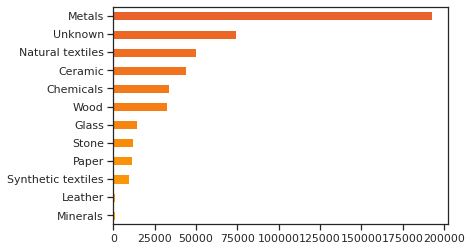

In [ ]:
merged_df.Category.value_counts().sort_values().plot(kind = 'barh', color=color)

My approach was quite successful though many words are still in unknown catecgory. If I would spend more time looking at the dataset I might decrease the number of unknown words, by adding new words in my dictionary. The better approach would be to use TfidfVectorizer to remove stopwords and count the frequencies of all words in this column based on their frequency add them into the dictionary. However, as I am a Bioinformatician I havent worked much with Text Processing (DNA and RNA are counted as text they are strings). Now we can create dummies variable from this column.

In [ ]:
pd.get_dummies(merged_df, columns=['Category']) 

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
Object ID                                                                   
1            1979.486.1         False             False             False   
2            1980.264.5         False             False             False   
3              67.265.9         False             False             False   
4             67.265.10         False             False             False   
5             67.265.11         False             False             False   
...                 ...           ...               ...               ...   
855654     17.50.16-114         False             False             False   
855655       50.576.105         False             False             False   
855656        17.3.1493         False             False             False   
855691       64.101.698         False             False              True   
855692     1971.180.185         False             False              True   

          Gallery Number                              Department  \
Object ID                                                          
1                    NaN                       The American Wing   
2                    NaN                       The American Wing   
3                    NaN                       The American Wing   
4                    NaN                       The American Wing   
5                    NaN                       The American Wing   
...                  ...                                     ...   
855654               NaN                     Drawings and Prints   
855655               NaN                     Drawings and Prints   
855656               NaN                     Drawings and Prints   
855691               NaN  European Sculpture and Decorative Arts   
855692               NaN  European Sculpture and Decorative Arts   

          AccessionYear     Object Name  \
Object ID                                 
1                1979.0            Coin   
2                1980.0            Coin   
3                1967.0            Coin   
4                1967.0            Coin   
5                1967.0            Coin   
...                 ...             ...   
855654           1917.0           Print   
855655           1950.0            Book   
855656           1917.0           Print   
855691           1964.0  Sweetmeat dish   
855692           1971.0          Figure   

                                                       Title  \
Object ID                                                      
1                               One-dollar Liberty Head Coin   
2                               Ten-dollar Liberty Head Coin   
3                                 Two-and-a-Half Dollar Coin   
4                                 Two-and-a-Half Dollar Coin   
5                                 Two-and-a-Half Dollar Coin   
...                                                      ...   
855654     An allegory, cupid standing on a horse casting...   
855655     Berenice talking with Phenice; illustration to...   
855656                                      Virgin enthroned   
855691                        Sweetmeat dish (one of a pair)   
855692                                                   Man   

                        Culture  ... Category_Glass Category_Leather  \
Object ID                        ...                                   
1                           NaN  ...              0                0   
2                           NaN  ...              0                0   
3                           NaN  ...              0                0   
4                           NaN  ...              0                0   
5                           NaN  ...              0                0   
...                         ...  ...            ...              ...   
855654                      NaN  ...              0                0   
855655                      NaN  ...              0                0   
855656    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=34d4c0b9-c0f7-4dea-9f1b-be8021c30c05' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>